#**Proyecto final en Analítica de datos**
**Joaquín Rodríguez y Natalia Sarmiento**

El proyecto que se presenta a continuación tiene el proposito de predecir el precio final de casas residenciales en la ciudad de Ames, Iowa. Se cuenta con una base de datos de licencia libre de Kaggle en la que se extraen 79 variables de tipo categórico y cuantitativo. Se busca en primera instancia hacer un análisis exploratorio y una limpieza de los datos para así poder aplicar el mejor algoritmo de machine learning de regresión que permita, tal y como se mencionó al principio, predecir el precio final de las casas.

#Importación de librerías

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson

#Preparación y visualización de datos

In [88]:
df = pd.read_csv("https://raw.githubusercontent.com/joaquinrovi/Analitica-de-datos/main/train.csv")

In [89]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
df.shape 

(1460, 81)

In [91]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [92]:
df.isna().sum().sum()

6965

In [93]:
pd.set_option('display.max_rows', df.isna().sum().shape[0]+1)
print(df.isna().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [94]:
pd.set_option('display.max_rows', df.isna().mean().shape[0]+1)
print(df.isna().mean())

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [95]:
df.corr(method="pearson")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [96]:
df.corr(method="spearman")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,-0.013038,-0.006736,-0.009509,-0.033187,-0.000616,0.009455,-0.028463,0.002812,0.004662,-0.021475,0.007269,0.002564,0.041650,0.007574,0.025888,-0.013644,-0.000194,0.013301,0.006505,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,-0.083871,-0.117603,-0.318897,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.002480,0.194912,0.282632,0.068763,0.277162,0.165825,0.019480,0.079268,0.024226,-0.047133,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,0.052516,0.119436,0.386206,0.427678,0.055111,-0.030230,0.375844,0.085990,-0.003854,0.220234,0.096777,0.327679,0.002231,0.365999,0.245315,0.115694,0.351756,0.378052,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,0.072019,0.077830,0.366197,0.443858,0.119356,-0.020255,0.449040,0.095609,0.045970,0.235377,0.142658,0.337788,-0.022752,0.405924,0.350198,0.041796,0.340195,0.367153,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,-0.117560,0.272939,0.459915,0.408730,0.289561,-0.034029,0.603262,0.098034,-0.050598,0.576372,0.298455,0.121517,-0.192439,0.427806,0.420626,0.618193,0.608756,0.541552,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,0.102471,-0.128270,-0.217375,-0.166686,0.001111,0.039556,-0.153720,-0.052676,0.116015,-0.262400,-0.071342,-0.003713,-0.099754,-0.104919,-0.045383,-0.379398,-0.254763,-0.200718,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,-0.111692,0.139014,0.427187,0.293363,0.029716,-0.145936,0.288493,0.162080,-0.066313,0.537420,0.244901,-0.035257,-0.155604,0.176820,0.174655,0.890546,0.601519,0.528281,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,-0.126086,0.176921,0.299042,0.240265,0.073049,-0.064542,0.282400,0.099904,-0.031495,0.431390,0.151562,-0.054371,-0.154208,0.198243,0.119270,0.722377,0.456245,0.398267,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,-0.035507,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,-0.061342,0.075561,0.360104,0.352351,0.063162,-0.106994,0.322678,0.121004,0.032870,0.290366,0.168776,0.113137,-0.049387,0.263912,0.255627,0.305964,0.401606,0.364755,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.013038,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,0.050398,-0.573638,0.410413,0.323478,-0.191236,-0.079054,0.057471,0.674175,0.090712,0.011986,-0.013907,-0.084164,-0.106369,-0.050062,0.192264,0.078935,0.181381,0.244161,0.179359,0.081420,-0.148339,0.046802,0.

#Análisis Exploratorio de Datos (inicial)

In [97]:
df1 = pd.DataFrame(data = df, columns = ['SalePrice', 'LotFrontage','GrLivArea','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                                   '1stFlrSF','2ndFlrSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea'])

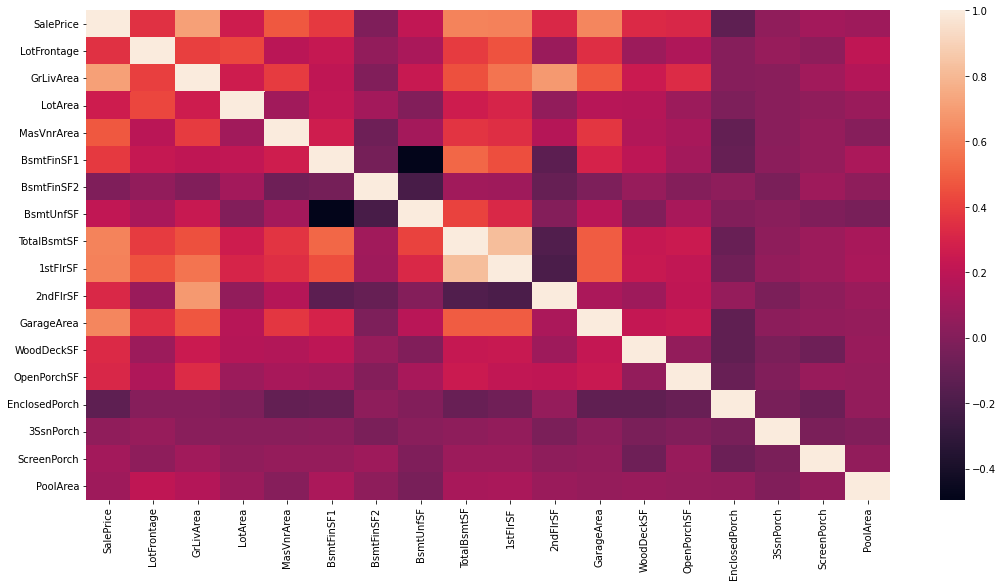

In [98]:
plt.figure(figsize=(18,9))
sns.heatmap(df1.corr(method="pearson"))

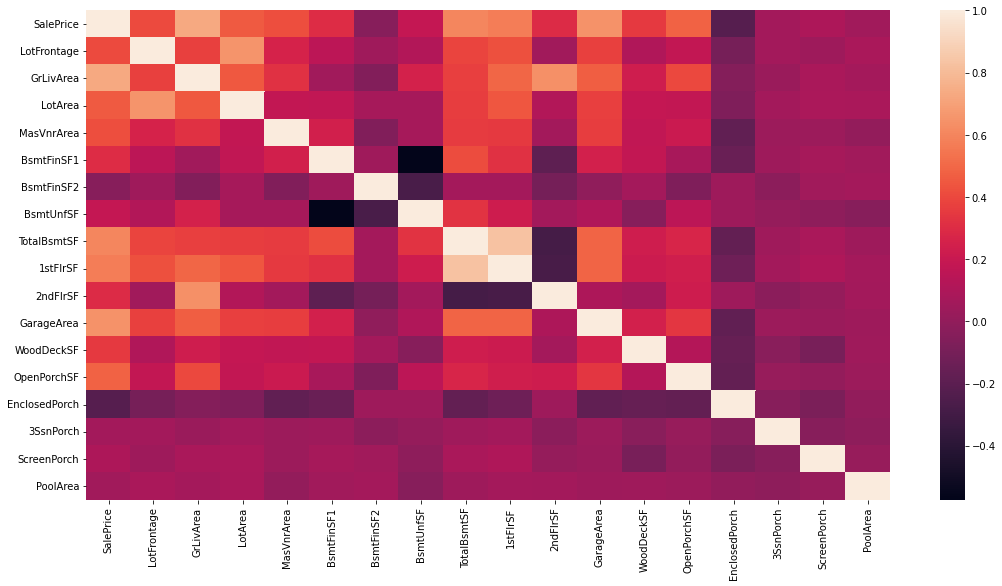

In [99]:
plt.figure(figsize=(18,9))
sns.heatmap(df1.corr(method="spearman"))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5143e7d50>,
      dtype=object)

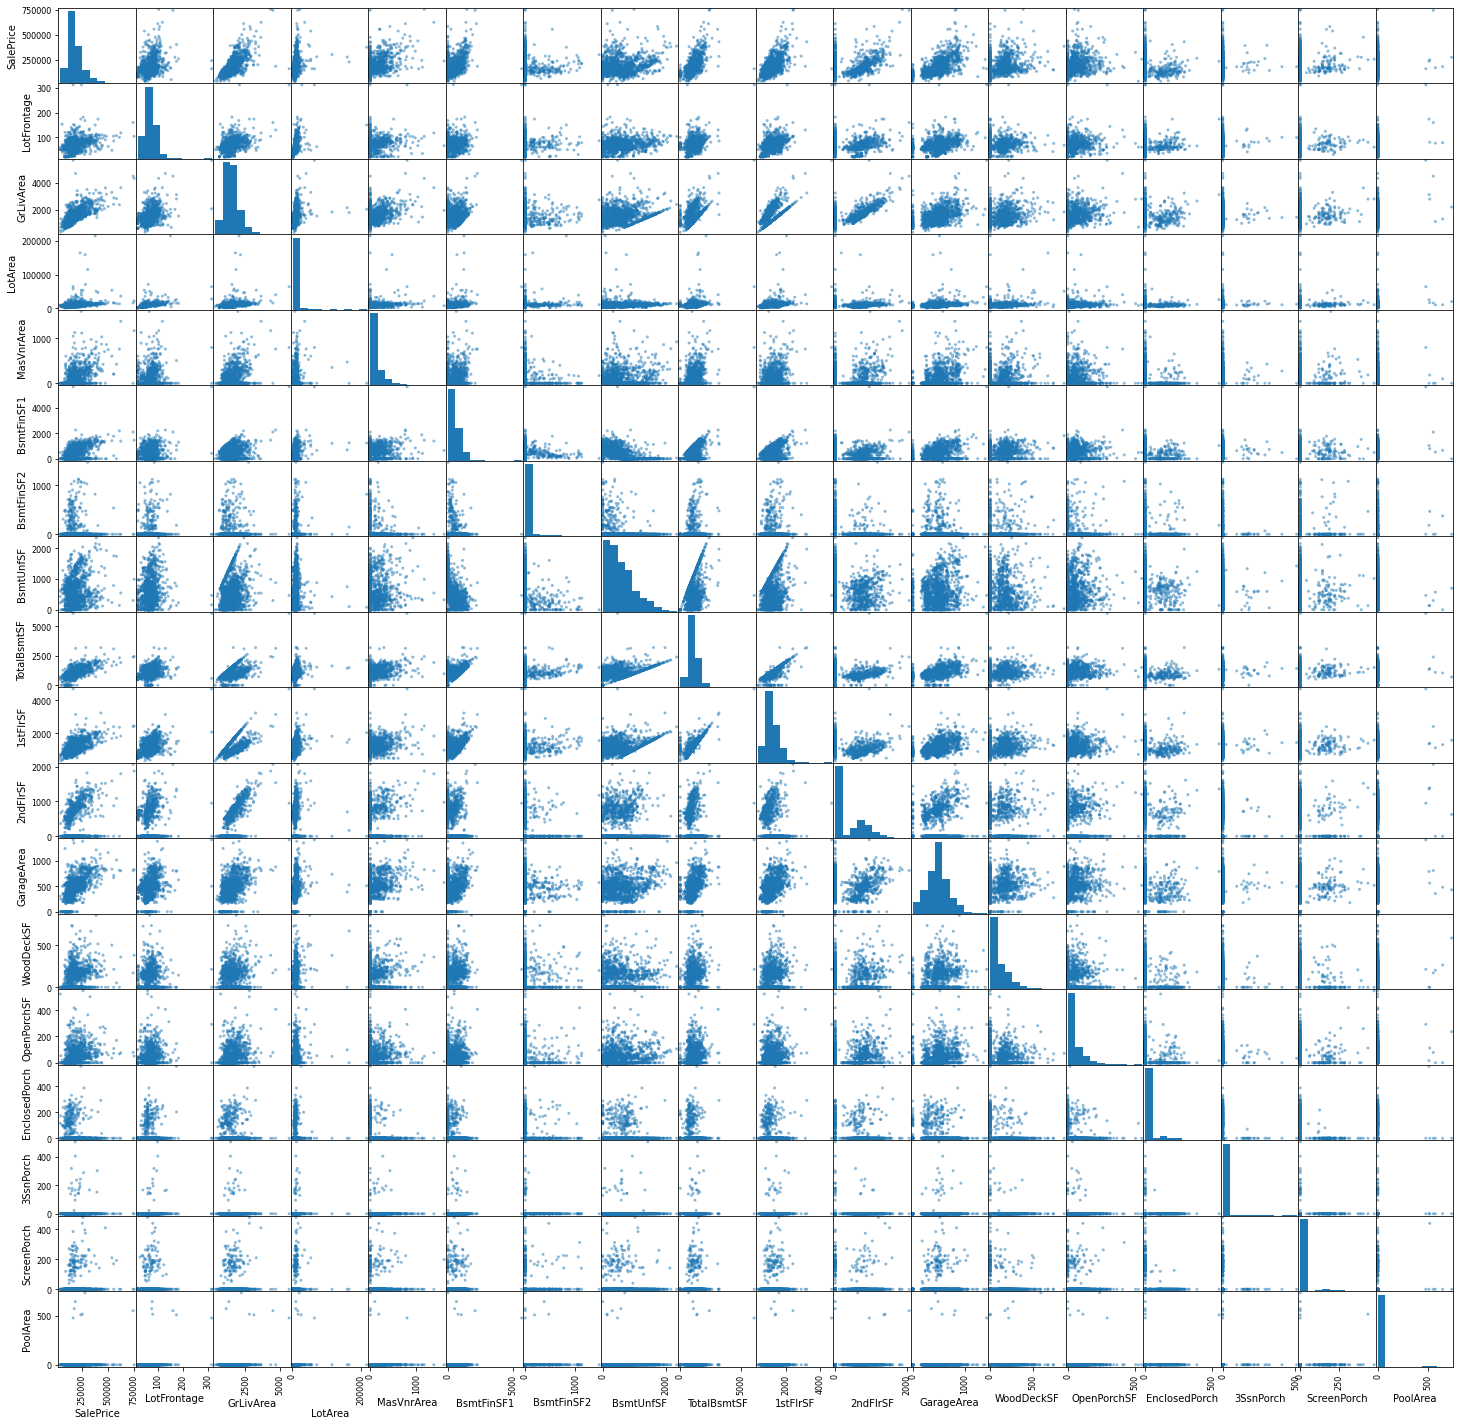

In [100]:
pd.plotting.scatter_matrix(df1.iloc[:,0:18], figsize = (25,25))

In [101]:
df1.describe()

,SalePrice,LotFrontage,GrLivArea,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,1460.000000,1201.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,70.049958,1515.463699,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904
std,79442.502883,24.284752,525.480383,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307
min,34900.000000,21.000000,334.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129975.000000,59.000000,1129.500000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,163000.000000,69.000000,1464.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,214000.000000,80.000000,1776.750000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000
max,755000.000000,313.000000,5642.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000


In [102]:
cuantitativas = ['SalePrice','LotFrontage','GrLivArea','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

In [103]:
for i in cuantitativas:
  print(stats.kstest(df[i],'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=nan, pvalue=nan)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=nan, pvalue=nan)
KstestResult(statistic=0.6794520547945205, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.9191780821917808, pvalue=0.0)
KstestResult(statistic=0.9746575342465753, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.9445205479452055, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5506532602650163, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)


In [104]:
df_1 = pd.DataFrame(data = df, columns = ['SalePrice', 'LotShape','Neighborhood','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond',
                                   'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','FireplaceQu', 'GarageQual','PoolQC','Fence'])

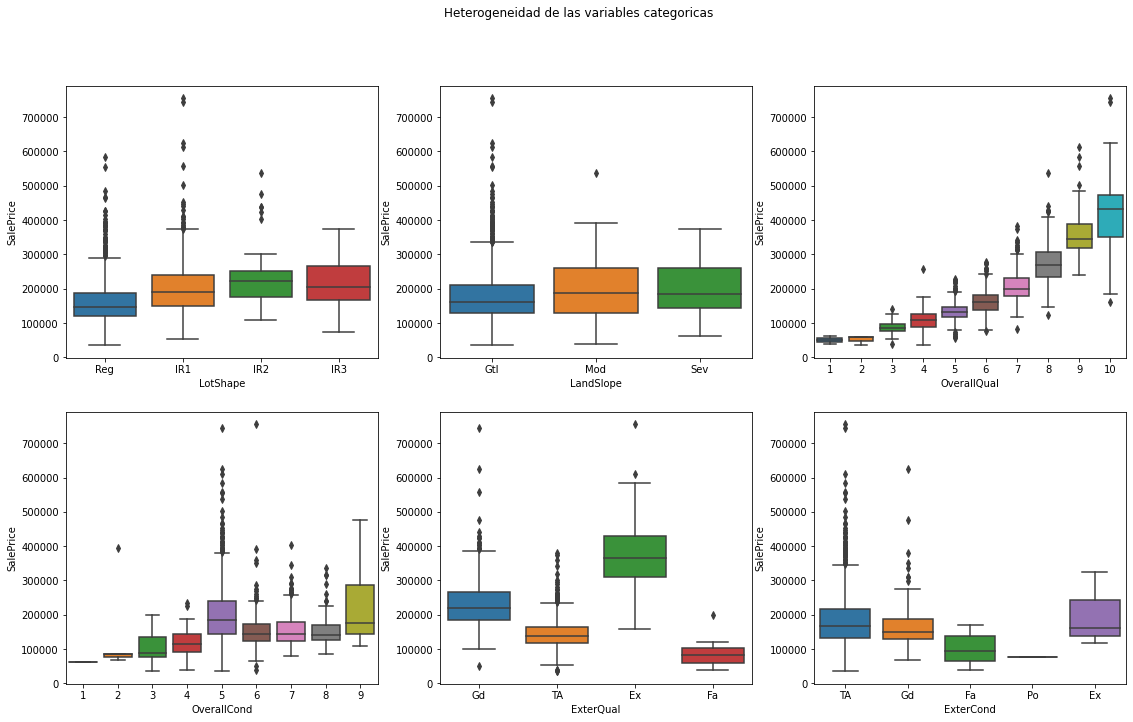

In [105]:
fig, axes = plt.subplots(2, 3, figsize=(19, 11))

fig.suptitle('Heterogeneidad de las variables categoricas')

sns.boxplot(ax=axes[0, 0], data=df_1, x='LotShape', y='SalePrice')
sns.boxplot(ax=axes[0, 1], data=df_1, x='LandSlope', y='SalePrice')
sns.boxplot(ax=axes[0, 2], data=df_1, x='OverallQual', y='SalePrice')
sns.boxplot(ax=axes[1, 0], data=df_1, x='OverallCond', y='SalePrice')
sns.boxplot(ax=axes[1, 1], data=df_1, x='ExterQual', y='SalePrice')
sns.boxplot(ax=axes[1, 2], data=df_1, x='ExterCond', y='SalePrice')

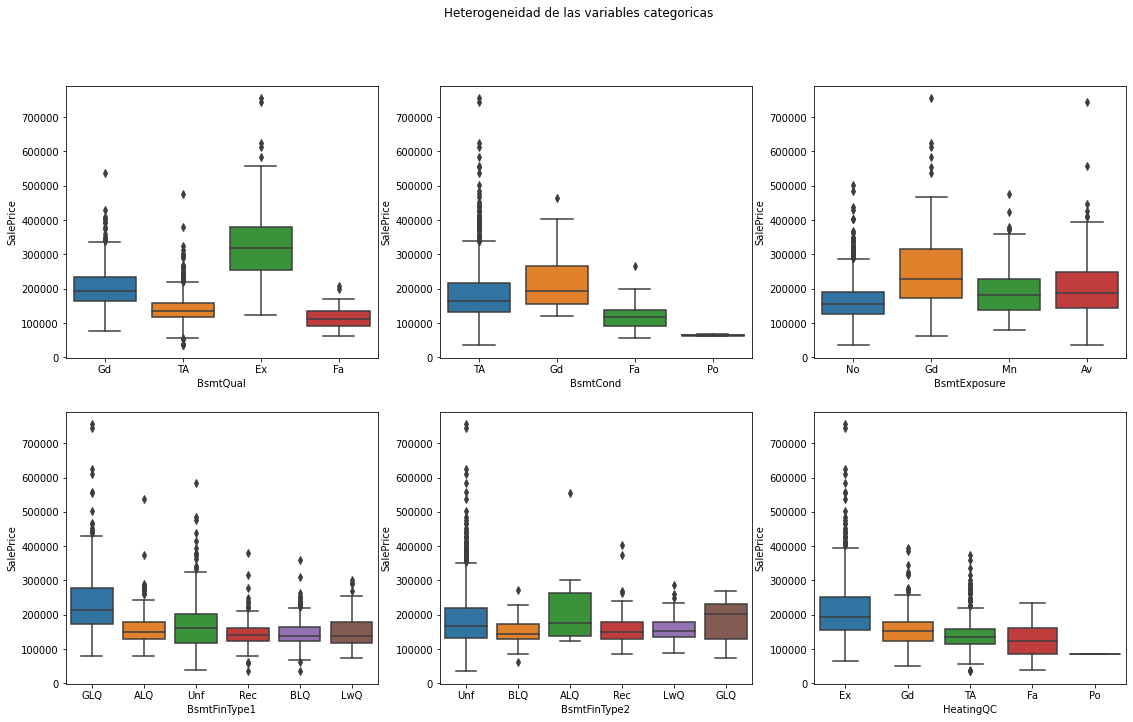

In [106]:
fig, axes = plt.subplots(2, 3, figsize=(19, 11))

fig.suptitle('Heterogeneidad de las variables categoricas')

sns.boxplot(ax=axes[0, 0], data=df_1, x='BsmtQual', y='SalePrice')
sns.boxplot(ax=axes[0, 1], data=df_1, x='BsmtCond', y='SalePrice')
sns.boxplot(ax=axes[0, 2], data=df_1, x='BsmtExposure', y='SalePrice')
sns.boxplot(ax=axes[1, 0], data=df_1, x='BsmtFinType1', y='SalePrice')
sns.boxplot(ax=axes[1, 1], data=df_1, x='BsmtFinType2', y='SalePrice')
sns.boxplot(ax=axes[1, 2], data=df_1, x='HeatingQC', y='SalePrice')

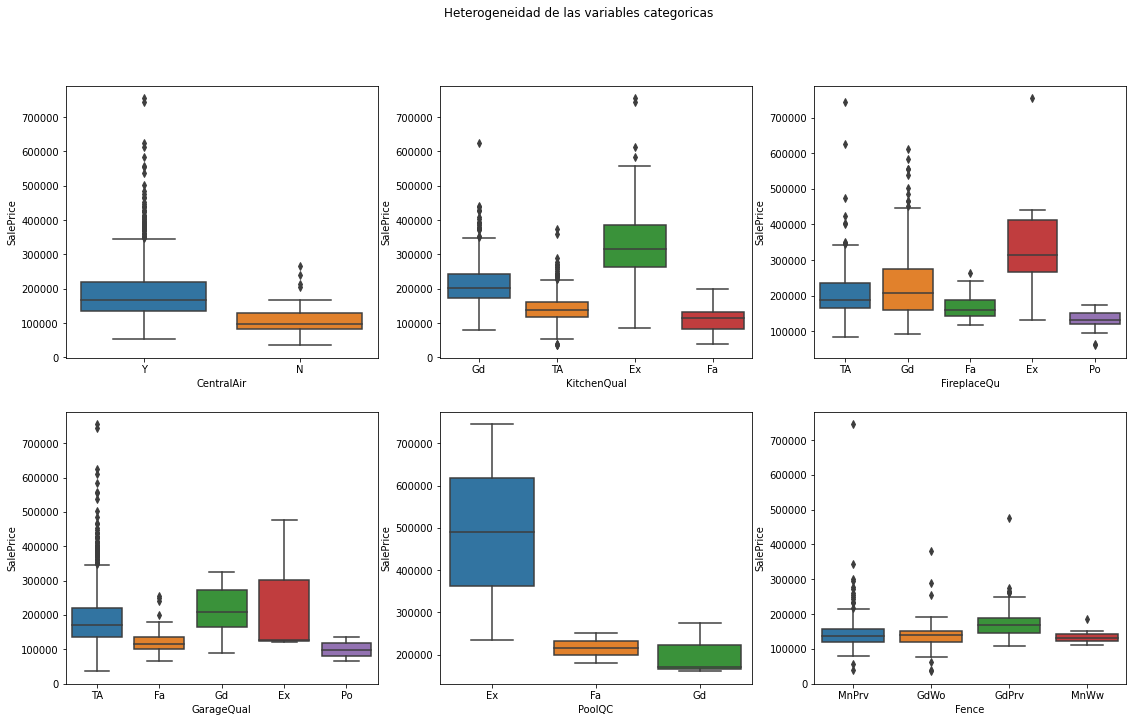

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(19, 11))

fig.suptitle('Heterogeneidad de las variables categoricas')

sns.boxplot(ax=axes[0, 0], data=df_1, x='CentralAir', y='SalePrice')
sns.boxplot(ax=axes[0, 1], data=df_1, x='KitchenQual', y='SalePrice')
sns.boxplot(ax=axes[0, 2], data=df_1, x='FireplaceQu', y='SalePrice')
sns.boxplot(ax=axes[1, 0], data=df_1, x='GarageQual', y='SalePrice')
sns.boxplot(ax=axes[1, 1], data=df_1, x='PoolQC', y='SalePrice')
sns.boxplot(ax=axes[1, 2], data=df_1, x='Fence', y='SalePrice')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

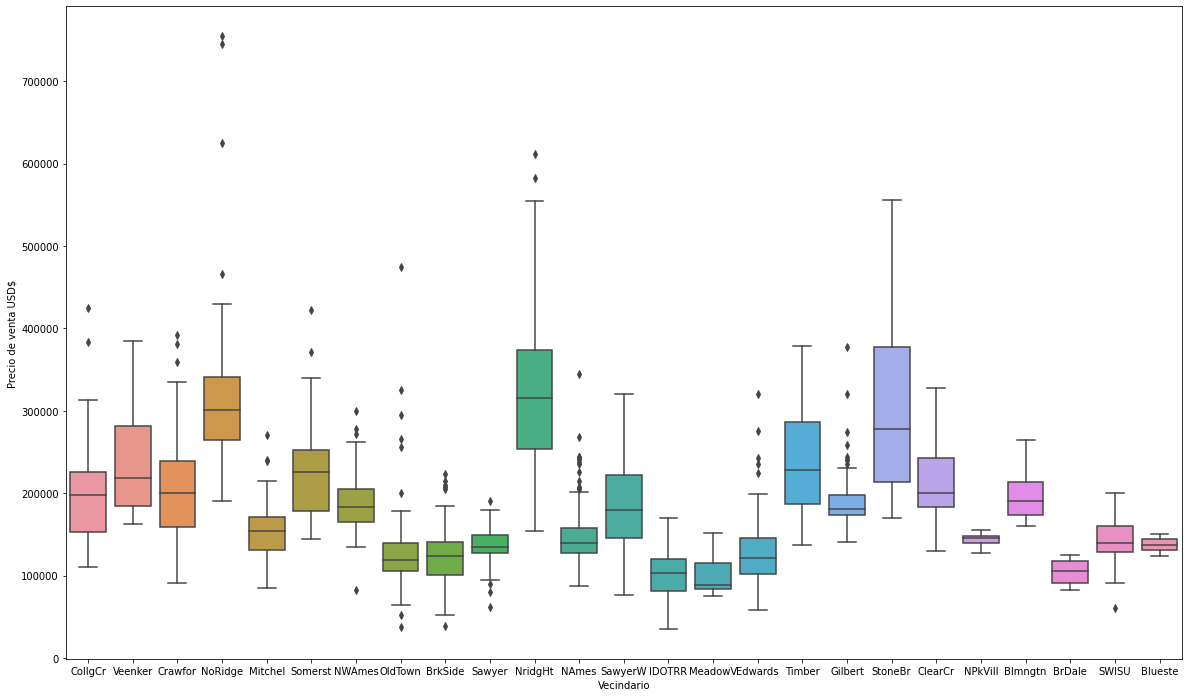

In [108]:
plt.figure(figsize=(20,12))
sns.boxplot(df_1['Neighborhood'], df_1['SalePrice'])
plt.xlabel('Vecindario')
plt.ylabel('Precio de venta USD$')

#Limpieza y organización de datos

Como la distribución de los datos de las variables relacionadas al área
no son normales a partir de la prueba de normalidad de Kolmogorov Smirnov, 
la eliminación de los datos atípicos se hará por medio del método del
rango intercuartílico. Además, para las variables cualitativas, los valores nulos serán remplazados por la mayor frecuencia de las categorías.

In [109]:
df['LotShape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace  = True)
df['LandSlope'].replace({'Gtl':3, 'Mod':2, 'Sev':1}, inplace  = True)
df['ExterQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace  = True)
df['ExterCond'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace  = True)
df['BsmtQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace  = True)
df['BsmtCond'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace  = True)
df['BsmtExposure'].replace({'Gd':4, 'Av':3, 'Mn':2, 'No':1}, inplace  = True)
df['BsmtFinType1'].replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}, inplace  = True)
df['BsmtFinType2'].replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}, inplace  = True)
df['HeatingQC'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace  = True)
df['CentralAir'].replace({'Y':1, 'N':0}, inplace  = True)
df['KitchenQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace  = True)
df['FireplaceQu'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace  = True)
df['GarageQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace  = True)
df['PoolQC'].replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1}, inplace  = True)
df['Fence'].replace({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1}, inplace  = True)
df['Neighborhood'].replace({'NridgHt':25,'NoRidge':24,'StoneBr':23,'Timber':22,'Veenker':21,'Somerst':20,'Crawfor':19,'ClearCr':18,'Blmngtn':17,'Gilbert':16,'CollgCr':15,'NWAmes':14,'SawyerW':13,'Mitchel':12,
                            'SWISU':11,'NAmes':10,'Sawyer':9,'NPkVill':8,'Blueste':7,'Edwards':6,'BrkSide':5,'OldTown':4, 'IDOTRR':3, 'BrDale':2, 'MeadowV':1}, inplace  = True)

df['GarageArea'] = df['GarageArea'].replace(0, df['GarageArea'].mean())
df['GarageQual'] = df['GarageQual'].replace(np.nan, 5)
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 2)
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 3)
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 4)
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 3)
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 3)
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan, 1978)

In [110]:
IQRLiving = df['GrLivArea'].quantile(0.75)-df['GrLivArea'].quantile(0.25)
IQRGarage = df['GarageArea'].quantile(0.75)-df['GarageArea'].quantile(0.25)
IQRBasement = df['TotalBsmtSF'].quantile(0.75)-df['TotalBsmtSF'].quantile(0.25)
IQRFirstF = df['1stFlrSF'].quantile(0.75)-df['1stFlrSF'].quantile(0.25)
IQRSecondF = df['2ndFlrSF'].quantile(0.75)-df['2ndFlrSF'].quantile(0.25)

MaxLiving = df['GrLivArea'].quantile(0.75) + IQRLiving*1.5
MinLiving = df['GrLivArea'].quantile(0.25) - IQRLiving*1.5

MaxGarage = df['GarageArea'].quantile(0.75) + IQRGarage*1.5
MinGarage = df['GarageArea'].quantile(0.25) - IQRGarage*1.5

MaxBasement = df['TotalBsmtSF'].quantile(0.75) + IQRBasement*1.5
MinBasement = df['TotalBsmtSF'].quantile(0.25) - IQRBasement*1.5

MaxFirstF = df['1stFlrSF'].quantile(0.75) + IQRFirstF*1.5
MinFirstF = df['1stFlrSF'].quantile(0.25) - IQRFirstF*1.5

MaxSecondF = df['2ndFlrSF'].quantile(0.75) + IQRSecondF*1.5
MinSecondF = df['2ndFlrSF'].quantile(0.25) - IQRSecondF*1.5

df2 = df
df2 = df2.drop(df2[df2['GrLivArea']>MaxLiving].index)
df2 = df2.drop(df2[df2['GrLivArea']<MinLiving].index)

df2 = df2.drop(df2[df2['GarageArea']>MaxGarage].index)
df2 = df2.drop(df2[df2['GarageArea']<MinGarage].index)

df2 = df2.drop(df2[df2['TotalBsmtSF']>MaxBasement].index)
df2 = df2.drop(df2[df2['TotalBsmtSF']<MinBasement].index)

df2 = df2.drop(df2[df2['1stFlrSF']>MaxFirstF].index)
df2 = df2.drop(df2[df2['1stFlrSF']<MinFirstF].index)

df2 = df2.drop(df2[df2['2ndFlrSF']>MaxSecondF].index)
df2 = df2.drop(df2[df2['2ndFlrSF']<MinSecondF].index)

df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,1,Lvl,AllPub,Inside,3,15,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,...,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548.0,3.0,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,1,Lvl,AllPub,FR2,3,21,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,...,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460.0,3.0,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,2,Lvl,AllPub,Inside,3,15,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,...,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608.0,3.0,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,2,Lvl,AllPub,Corner,3,19,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,...,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642.0,3.0,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,2,Lvl,AllPub,FR2,3,24,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,...,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836.0,3.0,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
df2.shape

(1309, 81)

#Análisis Exploratorio de Datos (limpios)

In [112]:
df2['LSalePrice'] = np.log(df2['SalePrice'])

In [113]:
ds = pd.DataFrame(data = df2, columns = ['LSalePrice', 'LotFrontage','GrLivArea','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                                   '1stFlrSF','2ndFlrSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff514640ad0>,
      dtype=object)

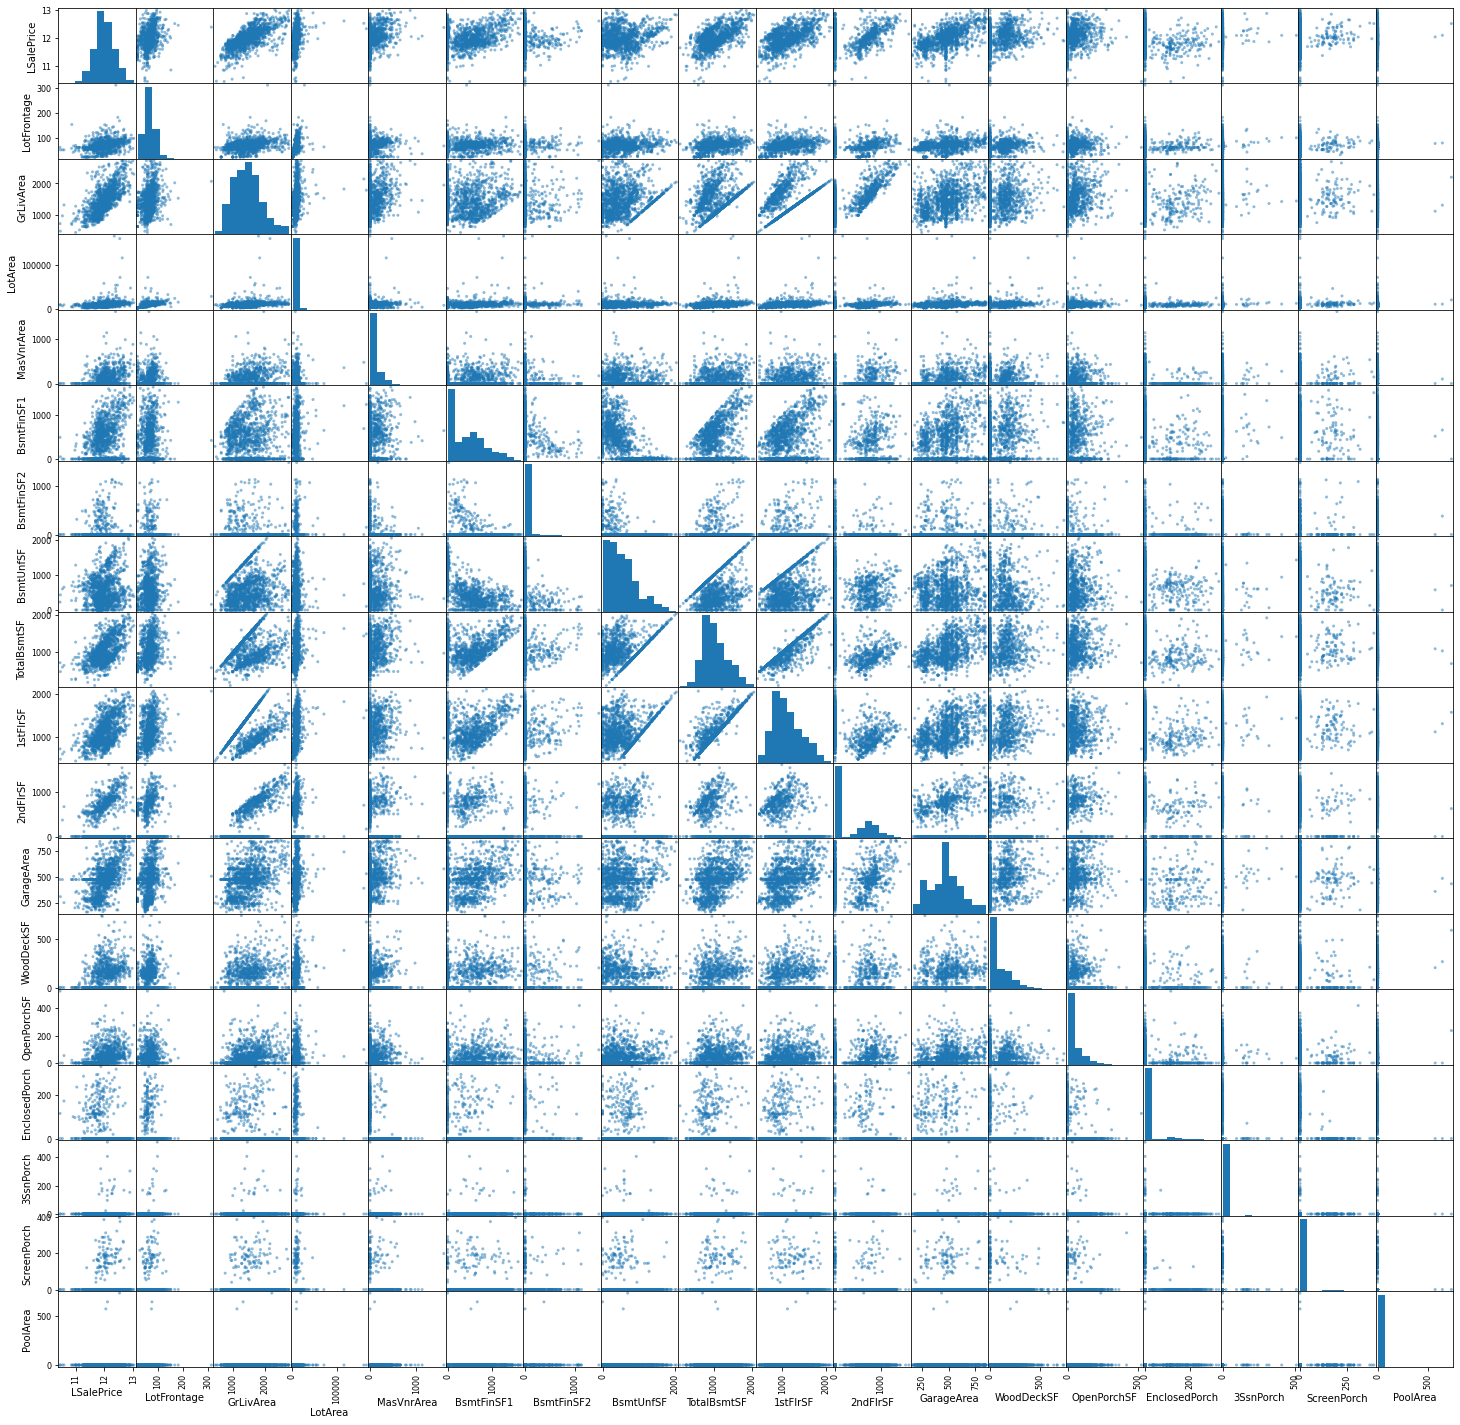

In [114]:
pd.plotting.scatter_matrix(ds.iloc[:,0:18], figsize = (25,25))

In [115]:
ds_1 = pd.DataFrame(data = df2, columns = ['LSalePrice', 'LotShape','Neighborhood','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond',
                                   'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','FireplaceQu', 'GarageQual','PoolQC','Fence'])

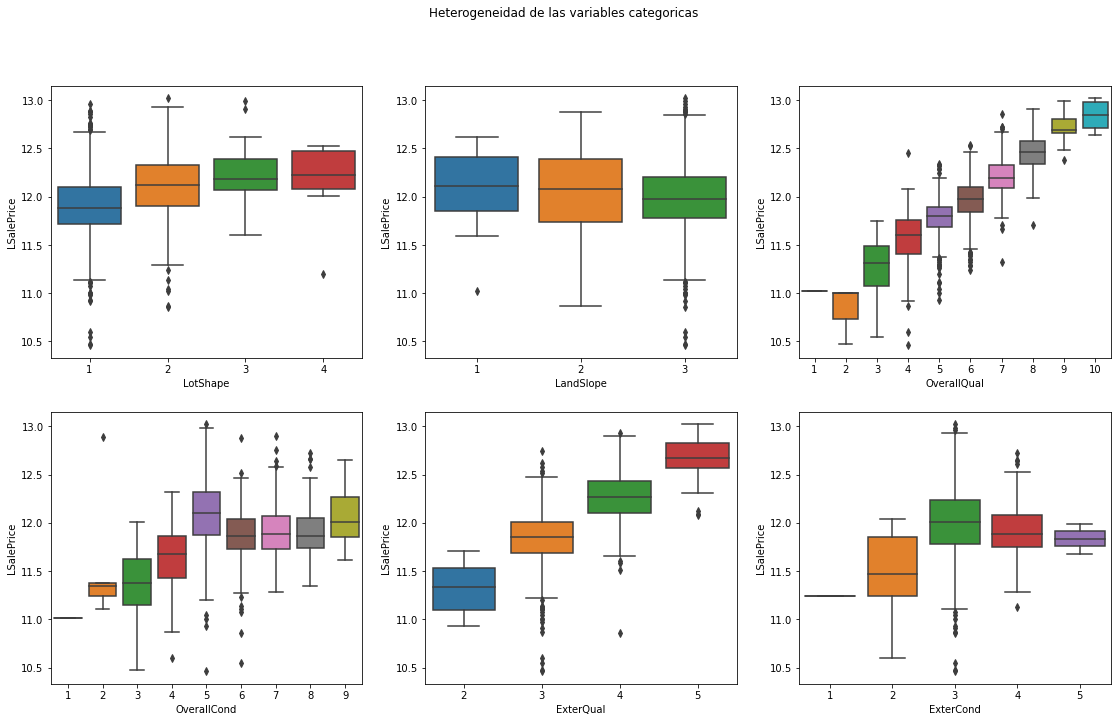

In [116]:
fig, axes = plt.subplots(2, 3, figsize=(19, 11))

fig.suptitle('Heterogeneidad de las variables categoricas')

sns.boxplot(ax=axes[0, 0], data=ds_1, x='LotShape', y='LSalePrice')
sns.boxplot(ax=axes[0, 1], data=ds_1, x='LandSlope', y='LSalePrice')
sns.boxplot(ax=axes[0, 2], data=ds_1, x='OverallQual', y='LSalePrice')
sns.boxplot(ax=axes[1, 0], data=ds_1, x='OverallCond', y='LSalePrice')
sns.boxplot(ax=axes[1, 1], data=ds_1, x='ExterQual', y='LSalePrice')
sns.boxplot(ax=axes[1, 2], data=ds_1, x='ExterCond', y='LSalePrice')

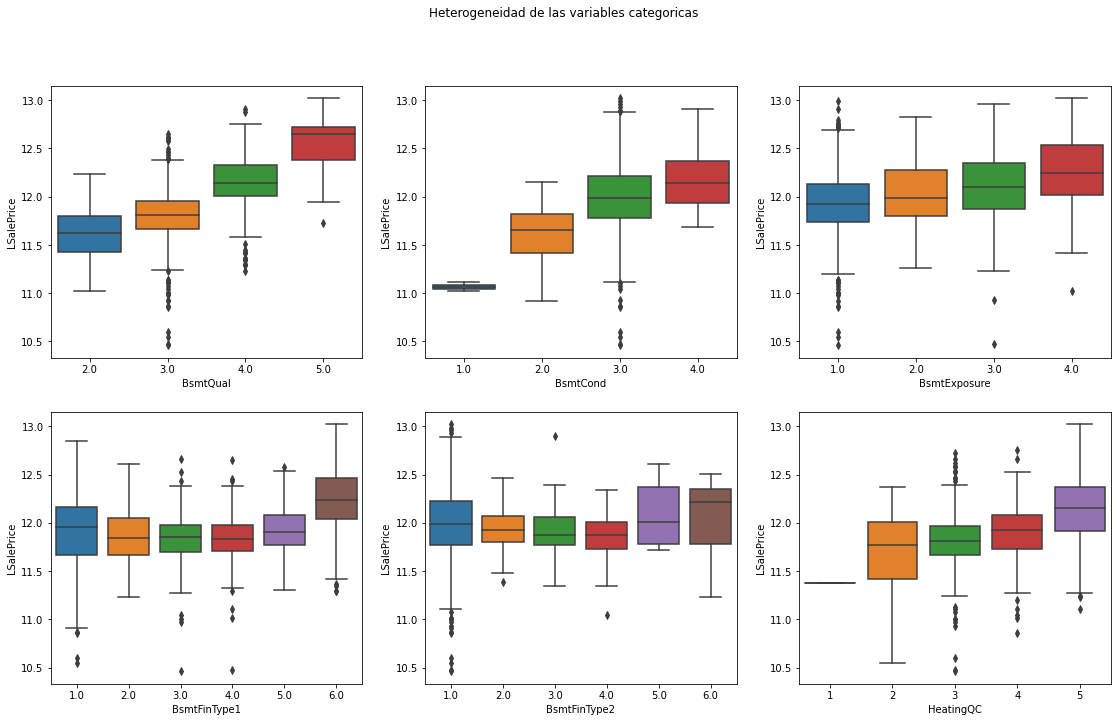

In [117]:
fig, axes = plt.subplots(2, 3, figsize=(19, 11))

fig.suptitle('Heterogeneidad de las variables categoricas')

sns.boxplot(ax=axes[0, 0], data=ds_1, x='BsmtQual', y='LSalePrice')
sns.boxplot(ax=axes[0, 1], data=ds_1, x='BsmtCond', y='LSalePrice')
sns.boxplot(ax=axes[0, 2], data=ds_1, x='BsmtExposure', y='LSalePrice')
sns.boxplot(ax=axes[1, 0], data=ds_1, x='BsmtFinType1', y='LSalePrice')
sns.boxplot(ax=axes[1, 1], data=ds_1, x='BsmtFinType2', y='LSalePrice')
sns.boxplot(ax=axes[1, 2], data=ds_1, x='HeatingQC', y='LSalePrice')

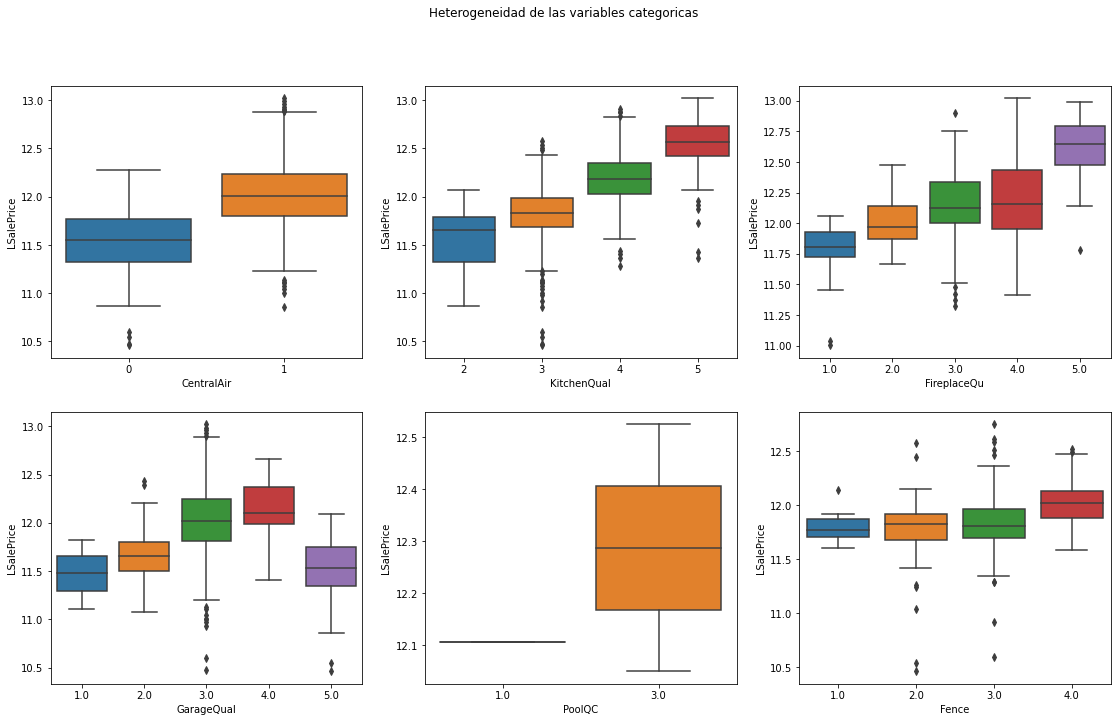

In [118]:
fig, axes = plt.subplots(2, 3, figsize=(19, 11))

fig.suptitle('Heterogeneidad de las variables categoricas')

sns.boxplot(ax=axes[0, 0], data=ds_1, x='CentralAir', y='LSalePrice')
sns.boxplot(ax=axes[0, 1], data=ds_1, x='KitchenQual', y='LSalePrice')
sns.boxplot(ax=axes[0, 2], data=ds_1, x='FireplaceQu', y='LSalePrice')
sns.boxplot(ax=axes[1, 0], data=ds_1, x='GarageQual', y='LSalePrice')
sns.boxplot(ax=axes[1, 1], data=ds_1, x='PoolQC', y='LSalePrice')
sns.boxplot(ax=axes[1, 2], data=ds_1, x='Fence', y='LSalePrice')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

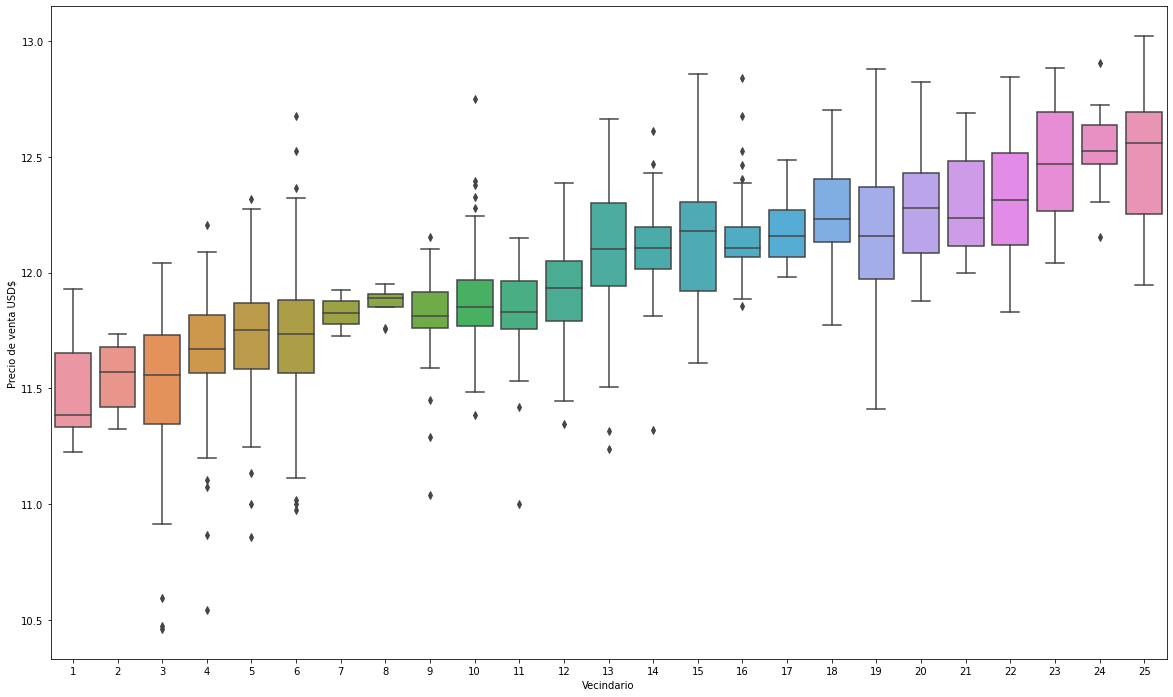

In [119]:
plt.figure(figsize=(20,12))
sns.boxplot(ds_1['Neighborhood'], ds_1['LSalePrice'])
plt.xlabel('Vecindario')
plt.ylabel('Precio de venta USD$')

#**Modelos de machine learning para regresión**

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [121]:
x = pd.DataFrame(data = df2, columns = ['GrLivArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','OverallQual','ExterQual','BsmtQual','CentralAir','KitchenQual','GarageQual','LotShape','Neighborhood'])

In [122]:
y = df2.iloc[:,81:]

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110499)

In [124]:
scaler = StandardScaler()
x_train_n = scaler.fit_transform(x_train)
x_test_n = scaler.fit_transform(x_test)

##Modelos Paramétricos

In [125]:
lr = LinearRegression()
pf2 = PolynomialFeatures(degree = 2)
pf3 = PolynomialFeatures(degree = 3)
pf4 = PolynomialFeatures(degree = 4)

###Primer grado

In [126]:
lr.fit(x_train_n, y_train)
y_predict1 = lr.predict(x_test_n)

###Segundo grado

In [127]:
x2_train_n = pf2.fit_transform(x_train_n)
x2_test_n = pf2.fit_transform(x_test_n)
pr2 = LinearRegression()
pr2.fit(x2_train_n,y_train)
y_predict2 = pr2.predict(x2_test_n)

###Tercer grado

In [128]:
x3_train_n = pf3.fit_transform(x_train_n)
x3_test_n = pf3.fit_transform(x_test_n)
pr3 = LinearRegression()
pr3.fit(x3_train_n,y_train)
y_predict3 = pr3.predict(x3_test_n)

###Cuarto grado

In [129]:
x4_train_n = pf4.fit_transform(x_train_n)
x4_test_n = pf4.fit_transform(x_test_n)
pr4 = LinearRegression()
pr4.fit(x4_train_n,y_train)
y_predict4 = pr4.predict(x4_test_n)

In [130]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score
def mean_absolute_percentage_error(y_test, y_predict): 
    y_test, y_predict = np.array(y_test), np.array(y_predict)
    return np.mean(np.abs((y_test - y_predict) / y_test)) * 100

In [131]:
print('MSE_1 = '+str(mean_squared_error(y_test, y_predict1)))
print('RMSE_1 = '+str(mean_squared_error(y_test, y_predict1, squared = False)))
print('MAE_1 = '+str(mean_absolute_error(y_test, y_predict1)))
print('MedAE_1 = '+str(median_absolute_error(y_test, y_predict1)))
print('MAPE_1 = '+str(mean_absolute_percentage_error(y_test, y_predict1)))
print('R^2_1 = '+str(r2_score(y_test, y_predict1)))
print(' ')
print('MSE_2 = '+str(mean_squared_error(y_test, y_predict2)))
print('RMSE_2 = '+str(mean_squared_error(y_test, y_predict2, squared = False)))
print('MAE_2 = '+str(mean_absolute_error(y_test, y_predict2)))
print('MedAE_2 = '+str(median_absolute_error(y_test, y_predict2)))
print('MAPE_2 = '+str(mean_absolute_percentage_error(y_test, y_predict2)))
print('R^2_2 = '+str(r2_score(y_test, y_predict2)))
print(' ')
print('MSE_3 = '+str(mean_squared_error(y_test, y_predict3)))
print('RMSE_3 = '+str(mean_squared_error(y_test, y_predict3, squared = False)))
print('MAE_3 = '+str(mean_absolute_error(y_test, y_predict3)))
print('MedAE_3 = '+str(median_absolute_error(y_test, y_predict3)))
print('MAPE_3 = '+str(mean_absolute_percentage_error(y_test, y_predict3)))
print('R^2_3 = '+str(r2_score(y_test, y_predict3)))
print(' ')
print('MSE_4 = '+str(mean_squared_error(y_test, y_predict4)))
print('RMSE_4 = '+str(mean_squared_error(y_test, y_predict4, squared = False)))
print('MAE_4 = '+str(mean_absolute_error(y_test, y_predict4)))
print('MedAE_4 = '+str(median_absolute_error(y_test, y_predict4)))
print('MAPE_4 = '+str(mean_absolute_percentage_error(y_test, y_predict4)))
print('R^2_4 = '+str(r2_score(y_test, y_predict4)))

MSE_1 = 0.021283897789584665
RMSE_1 = 0.14589001949956915
MAE_1 = 0.10605578809507128
MedAE_1 = 0.07366141049725261
MAPE_1 = 0.8929293264039123
R^2_1 = 0.8423463783467744
 
MSE_2 = 4.850501026879332e+20
RMSE_2 = 22023853039.101337
MAE_2 = 5761014175.712751
MedAE_2 = 1280575154.3917072
MAPE_2 = 48612874534.25437
R^2_2 = -3.592852499481671e+21
 
MSE_3 = 1.7017098743557548e+19
RMSE_3 = 4125178631.7149405
MAE_3 = 915603091.2958502
MedAE_3 = 83642020.4558141
MAPE_3 = 7853133820.84706
R^2_3 = -1.2604868118964765e+20
 
MSE_4 = 15363445533.592941
RMSE_4 = 123949.36681400571
MAE_4 = 62246.08048371498
MedAE_4 = 19089.759443852625
MAPE_4 = 516830.85171021783
R^2_4 = -113799777341.86359


Text(0, 0.5, 'Frecuencia')

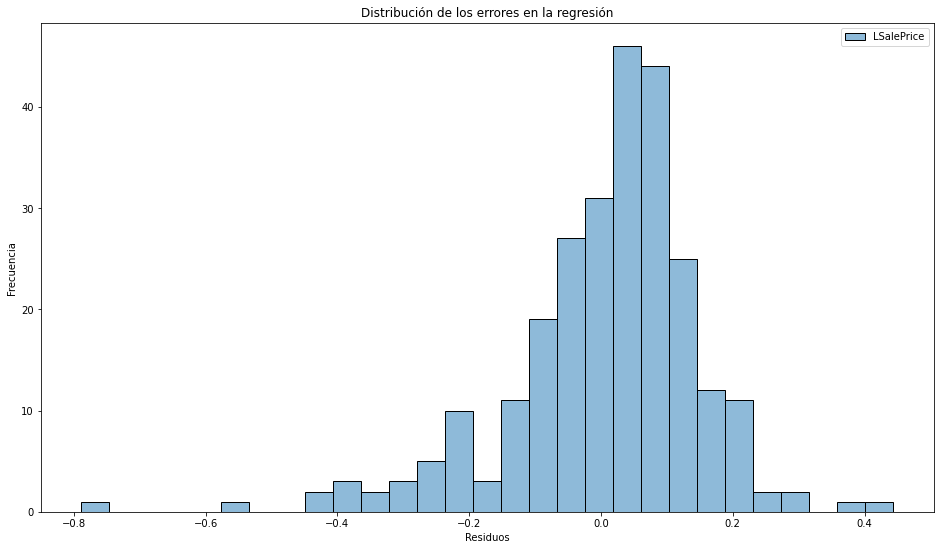

In [132]:
#Normalidad
error = y_test - y_predict1
plt.figure(figsize=(16,9))
sns.histplot(error).set_title('Distribución de los errores en la regresión')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Error')

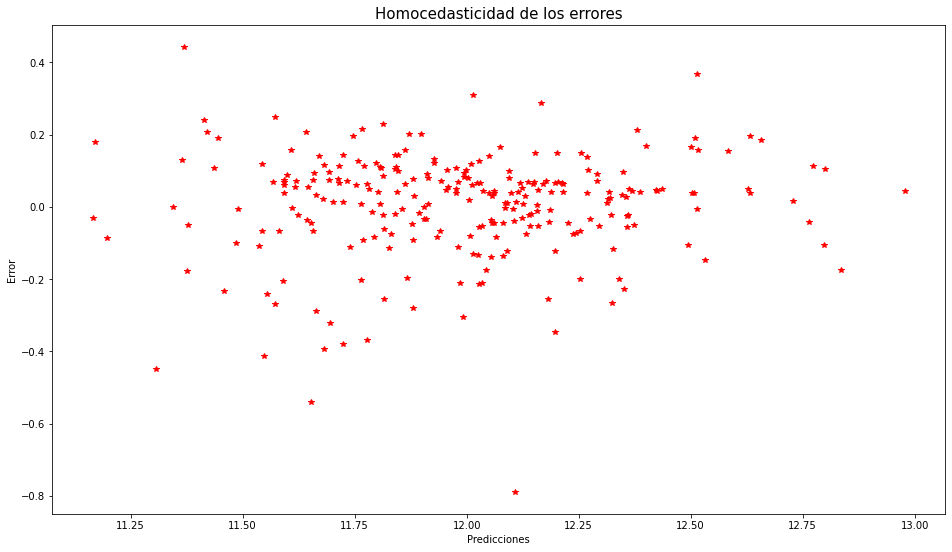

In [133]:
#Homocedasticidad
plt.figure(figsize=(16,9))
plt.plot(y_predict1, error,'r*')
plt.title('Homocedasticidad de los errores', fontsize=15)
plt.xlabel('Predicciones')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

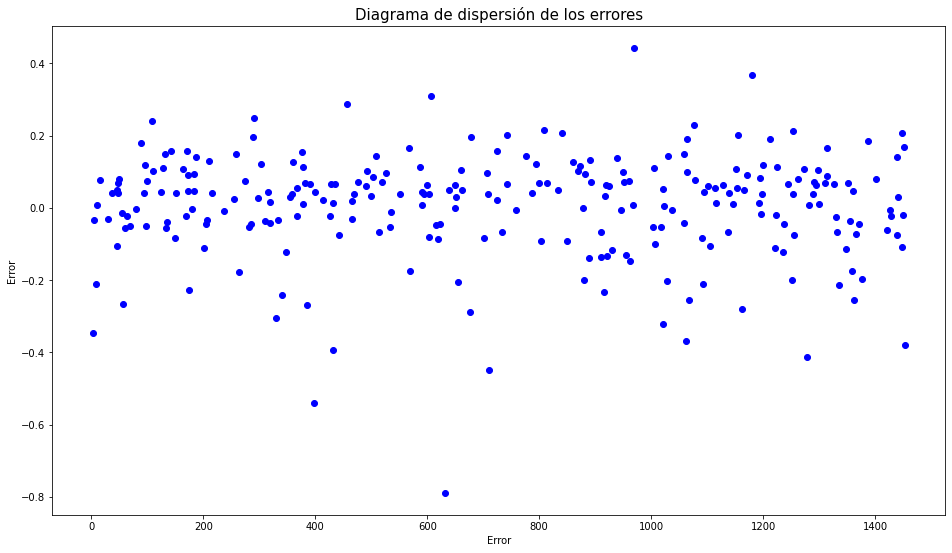

In [134]:
#Independencia
plt.figure(figsize=(16,9))
plt.plot(error,'bo')
plt.title('Diagrama de dispersión de los errores', fontsize=15)
plt.xlabel('Error')
plt.ylabel('Error')

In [135]:
print(stats.kstest(error,'norm'))
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
BreuschPaganTest = sms.het_breuschpagan(error, exog_het = x_test)
print(lzip(names, BreuschPaganTest))
print(durbin_watson(error))

KstestResult(statistic=0.7847567002405892, pvalue=6.677148806707292e-172)
[('Lagrange multiplier statistic', 51.905311209178194), ('p-value', 1.39967901922362e-06), ('f-value', 4.376433874364878), ('f p-value', 5.713833209084483e-07)]
[2.12105056]


##Modelos No Paramétricos

In [136]:
DT = DecisionTreeRegressor(random_state = 11041999)
RF = RandomForestRegressor(random_state = 11041999)
VR = SVR(kernel = 'rbf')
GBR = GradientBoostingRegressor(n_estimators = 40, random_state = 11041999)
KNR = KNeighborsRegressor(n_neighbors = 22)

In [137]:
DT.fit(x_train_n,y_train)
RF.fit(x_train_n,y_train)
VR.fit(x_train_n,y_train)
GBR.fit(x_train_n,y_train)
KNR.fit(x_train_n,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                    weights='uniform')

In [138]:
y1_predict = DT.predict(x_test_n)
y2_predict = RF.predict(x_test_n)
y3_predict = VR.predict(x_test_n)
y4_predict = GBR.predict(x_test_n)
y5_predict = KNR.predict(x_test_n)

In [139]:
print('MSE_1 = '+str(mean_squared_error(y_test, y1_predict)))
print('RMSE_1 = '+str(mean_squared_error(y_test, y1_predict, squared = False)))
print('MAE_1 = '+str(mean_absolute_error(y_test, y1_predict)))
print('MedAE_1 = '+str(median_absolute_error(y_test, y1_predict)))
print('MAPE_1 = '+str(mean_absolute_percentage_error(y_test, y1_predict)))
print('Accuracy_1 = '+str(r2_score(y_test, y1_predict)))
print(' ')
print('MSE_2 = '+str(mean_squared_error(y_test, y2_predict)))
print('RMSE_2 = '+str(mean_squared_error(y_test, y2_predict, squared = False)))
print('MAE_2 = '+str(mean_absolute_error(y_test, y2_predict)))
print('MedAE_2 = '+str(median_absolute_error(y_test, y2_predict)))
print('MAPE_2 = '+str(mean_absolute_percentage_error(y_test, y2_predict)))
print('Accuracy_2 = '+str(r2_score(y_test, y2_predict)))
print(' ')
print('MSE_3 = '+str(mean_squared_error(y_test, y3_predict)))
print('RMSE_3 = '+str(mean_squared_error(y_test, y3_predict, squared = False)))
print('MAE_3 = '+str(mean_absolute_error(y_test, y3_predict)))
print('MedAE_3 = '+str(median_absolute_error(y_test, y3_predict)))
print('MAPE_3 = '+str(mean_absolute_percentage_error(y_test, y3_predict)))
print('Accuracy_3 = '+str(r2_score(y_test, y3_predict)))
print(' ')
print('MSE_4 = '+str(mean_squared_error(y_test, y4_predict)))
print('RMSE_4 = '+str(mean_squared_error(y_test, y4_predict, squared = False)))
print('MAE_4 = '+str(mean_absolute_error(y_test, y4_predict)))
print('MedAE_4 = '+str(median_absolute_error(y_test, y4_predict)))
print('MAPE_4 = '+str(mean_absolute_percentage_error(y_test, y4_predict)))
print('Accuracy_4 = '+str(r2_score(y_test, y4_predict)))
print(' ')
print('MSE_5 = '+str(mean_squared_error(y_test, y5_predict)))
print('RMSE_5 = '+str(mean_squared_error(y_test, y5_predict, squared = False)))
print('MAE_5 = '+str(mean_absolute_error(y_test, y5_predict)))
print('MedAE_5 = '+str(median_absolute_error(y_test, y5_predict)))
print('MAPE_5 = '+str(mean_absolute_percentage_error(y_test, y5_predict)))
print('Accuracy_5 = '+str(r2_score(y_test, y5_predict)))

MSE_1 = 0.04810950294427446
RMSE_1 = 0.21933878577277313
MAE_1 = 0.15232567792684226
MedAE_1 = 0.10254417149331996
MAPE_1 = 3.4255591406749075
Accuracy_1 = 0.6436443432455798
 
MSE_2 = 0.022918124626635488
RMSE_2 = 0.1513873331115767
MAE_2 = 0.1060098301419132
MedAE_2 = 0.0740138877730736
MAPE_2 = 3.2378196800274366
Accuracy_2 = 0.8302413691040578
 
MSE_3 = 0.02677078338691411
RMSE_3 = 0.16361779666929302
MAE_3 = 0.11278663067376618
MedAE_3 = 0.07397981912109941
MAPE_3 = 3.224061161665225
Accuracy_3 = 0.8017040394966407
 
MSE_4 = 0.021024810156522668
RMSE_4 = 0.1449993453658418
MAE_4 = 0.10335025863737343
MedAE_4 = 0.07539584641081465
MAPE_4 = 3.2317881787805502
Accuracy_4 = 0.8442654865891459
 
MSE_5 = 0.02416208082106035
RMSE_5 = 0.15544156722402264
MAE_5 = 0.11031495942308753
MedAE_5 = 0.07475967739638723
MAPE_5 = 0.9262815549822032
Accuracy_5 = 0.8210271640196388


##Número de estimadores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was pas

Text(0, 0.5, 'Accuracy')

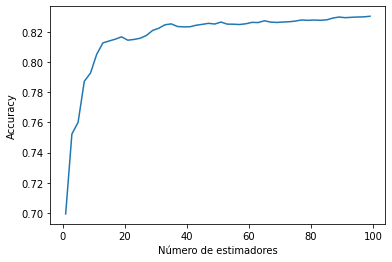

In [140]:
#Random Forest Regressor
Accuracy = []
MAPE_test = []
for i in range(1,100,2):
  RFi = RandomForestRegressor(n_estimators = i, random_state = 11041999)
  RFi.fit(x_train_n,y_train)
  yRF_predict = RFi.predict(x_test_n)
  Accuracy.append(r2_score(y_test, yRF_predict))
  MAPE_test.append(mean_absolute_percentage_error(y_test,yRF_predict))
Accuracy = np.array(Accuracy)
MAPE_test = np.array(MAPE_test)

plt.plot(np.arange(1,100,2),Accuracy)
plt.xlabel('Número de estimadores')
plt.ylabel('Accuracy')

Text(0, 0.5, 'MAPE')

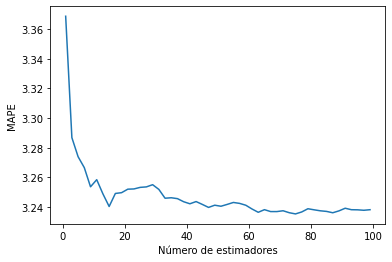

In [141]:
plt.plot(np.arange(1,100,2),MAPE_test)
plt.xlabel('Número de estimadores')
plt.ylabel('MAPE')

Text(0, 0.5, 'Accuracy')

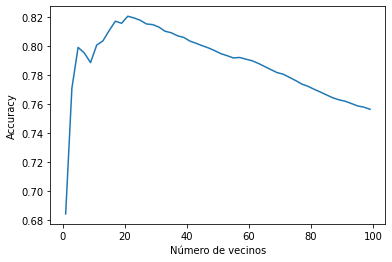

In [142]:
#K-Nearest Neighbors Regressor
Accuracy2 = []
MAPE_test2 = []
for i in range(1,100,2):
  KNRi = KNeighborsRegressor(n_neighbors = i)
  KNRi.fit(x_train_n,y_train)
  yKNR_predict = KNRi.predict(x_test_n)
  Accuracy2.append(r2_score(y_test, yKNR_predict))
  MAPE_test2.append(mean_absolute_percentage_error(y_test,yKNR_predict))
Accuracy2 = np.array(Accuracy2)
MAPE_test2 = np.array(MAPE_test2)

plt.plot(np.arange(1,100,2),Accuracy2)
plt.xlabel('Número de vecinos')
plt.ylabel('Accuracy')

Text(0, 0.5, 'MAPE')

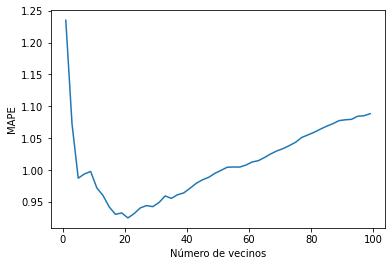

In [143]:
plt.plot(np.arange(1,100,2),MAPE_test2)
plt.xlabel('Número de vecinos')
plt.ylabel('MAPE')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Text(0, 0.5, 'Accuracy')

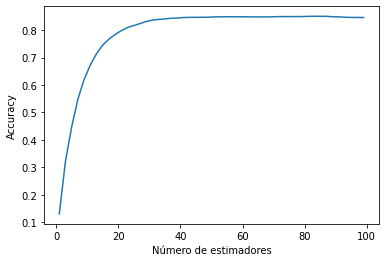

In [144]:
#Gradient Booster Regressor
Accuracy3 = []
MAPE_test3 = []
for i in range(1,100,2):
  GBRi = GradientBoostingRegressor(n_estimators = i, random_state = 11041999)
  GBRi.fit(x_train_n,y_train)
  yGBR_predict = GBRi.predict(x_test_n)
  Accuracy3.append(r2_score(y_test, yGBR_predict))
  MAPE_test3.append(mean_absolute_percentage_error(y_test,yGBR_predict))
Accuracy3 = np.array(Accuracy3)
MAPE_test3 = np.array(MAPE_test3)

plt.plot(np.arange(1,100,2),Accuracy3)
plt.xlabel('Número de estimadores')
plt.ylabel('Accuracy')

Text(0, 0.5, 'MAPE')

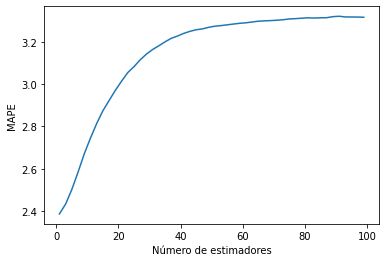

In [145]:
plt.plot(np.arange(1,100,2),MAPE_test3)
plt.xlabel('Número de estimadores')
plt.ylabel('MAPE')

#Conclusiones 

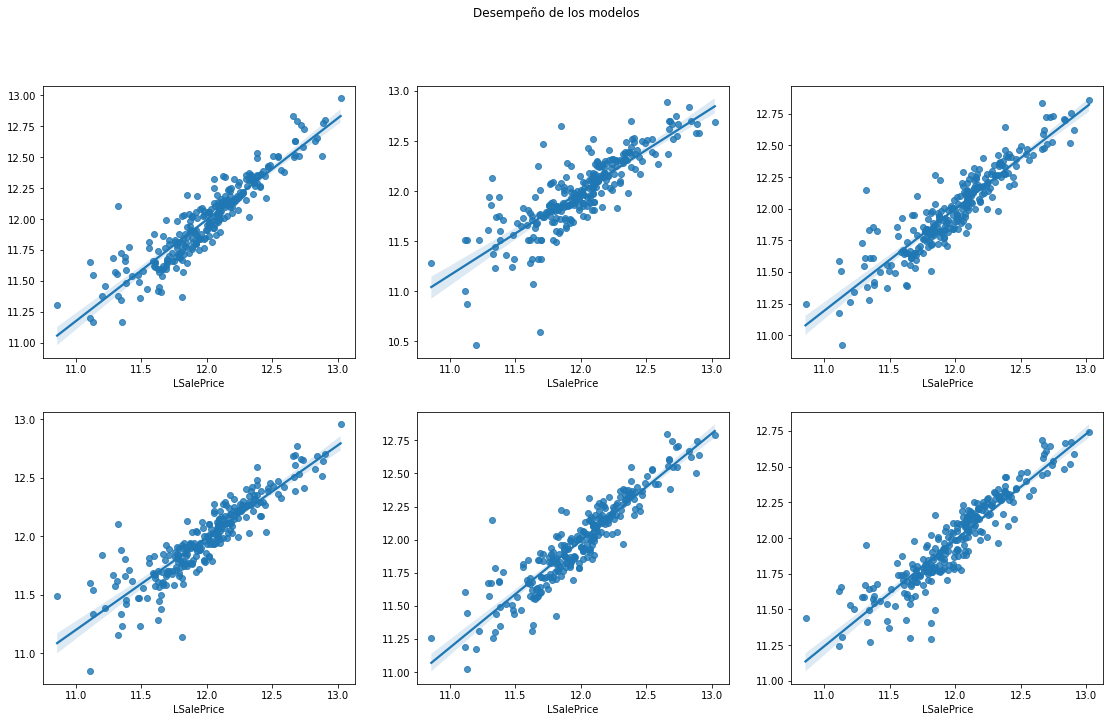

In [146]:
fig, axes = plt.subplots(2, 3, figsize=(19, 11))

fig.suptitle('Desempeño de los modelos')

sns.regplot(ax=axes[0, 0], x = y_test, y = y_predict1)
sns.regplot(ax=axes[0, 1], x = y_test, y = y1_predict)
sns.regplot(ax=axes[0, 2], x = y_test, y = y2_predict)
sns.regplot(ax=axes[1, 0], x = y_test, y = y3_predict)
sns.regplot(ax=axes[1, 1], x = y_test, y = y4_predict)
sns.regplot(ax=axes[1, 2], x = y_test, y = y5_predict)

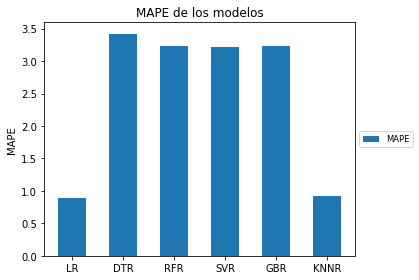

In [147]:
labels = ['LR', 'DTR', 'RFR', 'SVR', 'GBR', 'KNNR']
measures = ['MAPE']
Performance = []
Performance.append([mean_absolute_percentage_error(y_test,y_predict1), mean_absolute_percentage_error(y_test,y1_predict), mean_absolute_percentage_error(y_test,y2_predict), mean_absolute_percentage_error(y_test,y3_predict), mean_absolute_percentage_error(y_test,y4_predict), mean_absolute_percentage_error(y_test,y5_predict)])

x = np.arange(len(labels))*2 
width = 1.1 

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width+0.3 -0.3, Performance[i],width, label=measures[i])
    
ax.set_ylabel('MAPE')
ax.set_title('MAPE de los modelos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small',bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

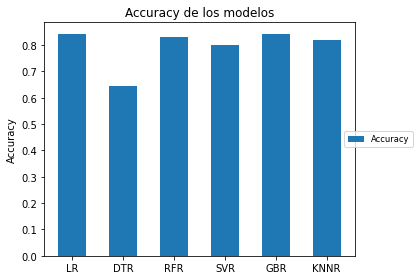

In [148]:
labels = ['LR', 'DTR', 'RFR', 'SVR', 'GBR', 'KNNR']
measures = ['Accuracy']
Performance = []
Performance.append([r2_score(y_test,y_predict1), r2_score(y_test,y1_predict), r2_score(y_test,y2_predict), r2_score(y_test,y3_predict), r2_score(y_test,y4_predict), r2_score(y_test,y5_predict)])

x = np.arange(len(labels))*2  
width = 1.1 
fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width+0.3 -0.3, Performance[i],width, label=measures[i])
    
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy de los modelos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small',bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()